# Aufgabe 5.4: Lösung 

In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import arviz as az
import pymc as pm
import warnings
warnings.filterwarnings("ignore")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = pd.read_csv("./Daten/chemical_shifts.csv",header=None)
#df = df.iloc[:,0]

az.style.use("arviz-darkgrid")

df.head()

,0
0,51.06
1,55.12
2,53.73
3,50.24
4,52.05


## a) b) Der folgende Code braucht einige Zeit für die Ausführung.

In [7]:
with pm.Model() as model_1:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = 10
    y = pm.Normal('y', mu=μ, sigma=σ, observed=df)
    trace_1 = pm.sample()
    trace_1_smc = pm.sample_smc(chains=2)
    
with pm.Model() as model_2:
    μ = pm.Uniform('μ', lower=0, upper=200)
    σ = 10
    y = pm.Normal('y', mu=μ, sigma=σ, observed=df)
    trace_2 = pm.sample()
    trace_2_smc = pm.sample_smc(chains=2)

with pm.Model() as model_3:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.Uniform('σ', lower=0, upper=20)
    y = pm.Normal('y', mu=μ, sigma=σ, observed=df)
    trace_3 = pm.sample()
    trace_3_smc = pm.sample_smc(chains=2)
    

with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75)
    σ = pm.HalfNormal('σ', sigma=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', mu=μ, sigma=σ, nu=ν, observed=df)
    trace_t_smc = pm.sample_smc(chains=2)
    trace_t = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Initializing SMC sampler...
Sampling 2 chains in 2 jobs


We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Initializing SMC sampler...
Sampling 2 chains in 2 jobs


We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
Initializing SMC sampler...
Sampling 2 chains in 2 jobs


We recommend running at least 4 chains for robust computation of convergence diagnostics
Initializing SMC sampler...
Sampling 2 chains in 2 jobs


We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, ν]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


## c)

Sampling: [y]


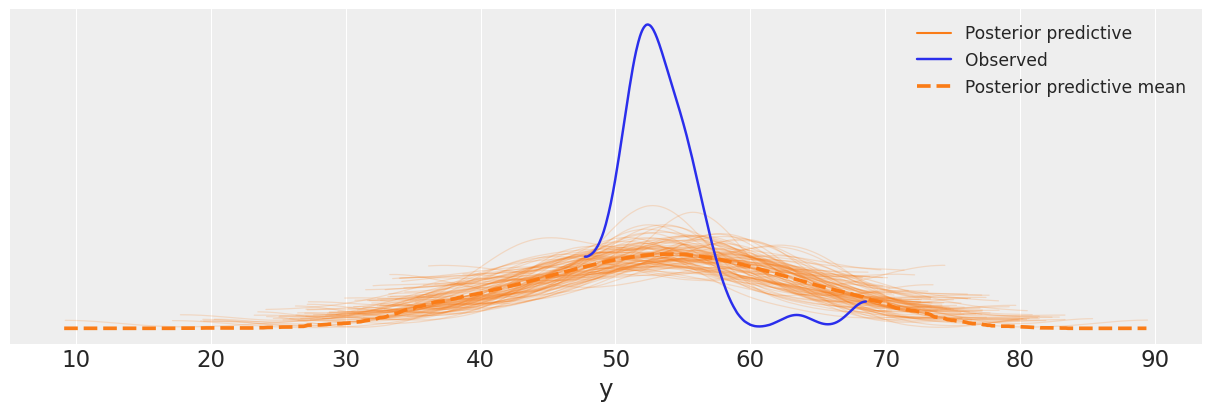

In [8]:
y_pred_1 = pm.sample_posterior_predictive(trace_1, model=model_1, extend_inferencedata=True, random_seed=123)
data_ppc_1 = az.plot_ppc(trace_1, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


Sampling: [y]


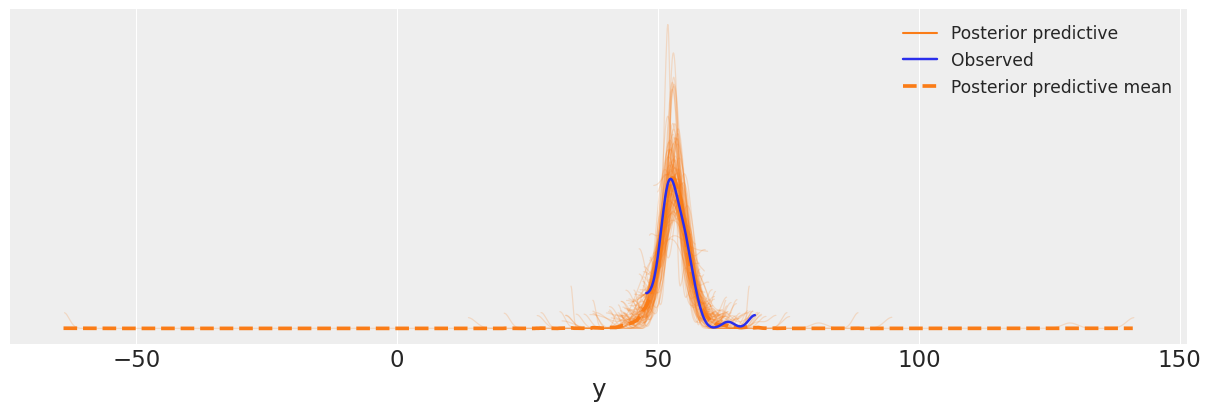

In [9]:
y_pred_t = pm.sample_posterior_predictive(trace_t, model=model_t, extend_inferencedata=True, random_seed=123)
data_ppc_t = az.plot_ppc(trace_t, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Beachten Sie: Die gestrichelte Linien sind die Durchschnitte der posterior predictive samples.

Obwohl der Modus in `model_1` mit dem Modus der posterior predictive Verteilung überstimmt, ist die Streuung sehr viel grösser. Damit ist auch die Vorhersagekraft dieses Modells nur sehr beschränkt brauchbar. Anders sieht es beim `model_t` aus. Dort stimmt die gestrichelte Kurve fast mit den Daten überein. Die Vorhersagekraft ist also wesentlich grösser.

## d)

Sampling: [y]


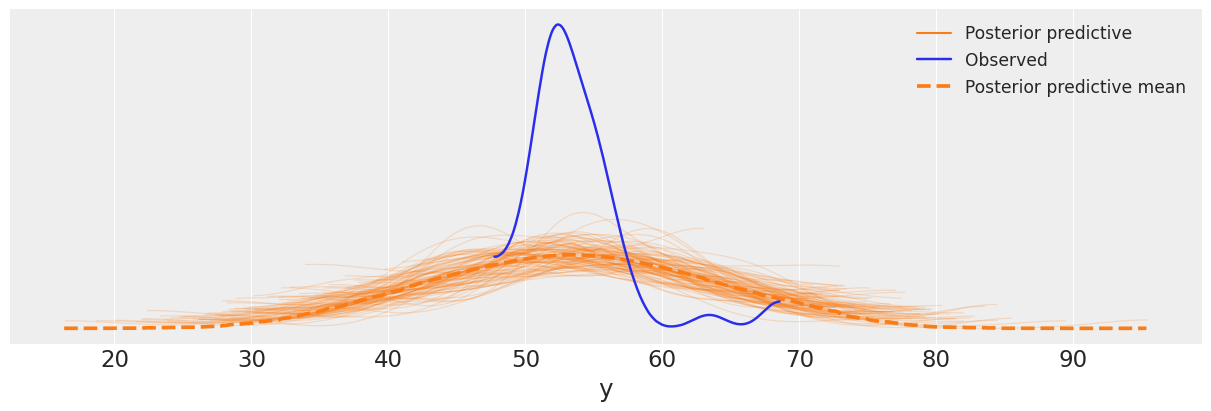

In [10]:
y_pred_2 = pm.sample_posterior_predictive(trace_2, model=model_2, extend_inferencedata=True, random_seed=123)
data_ppc_2 = az.plot_ppc(trace_2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

`model_2` sieht sehr ähnlich aus wie `model_1`.

## e)

In [11]:
BF_smc = np.exp(trace_1_smc.sample_stats["log_marginal_likelihood"].mean() - trace_3_smc.sample_stats["log_marginal_likelihood"].mean())
print(np.round(BF_smc.item(),2))

0.0


Die Faktoren sind fast 0 und somit unter 0.3333. `model_3` passt wesentlich besser zu den Daten, obwohl die Modelle ähnlich sind.

Machen wir noch den posterior predictive check:

Sampling: [y]


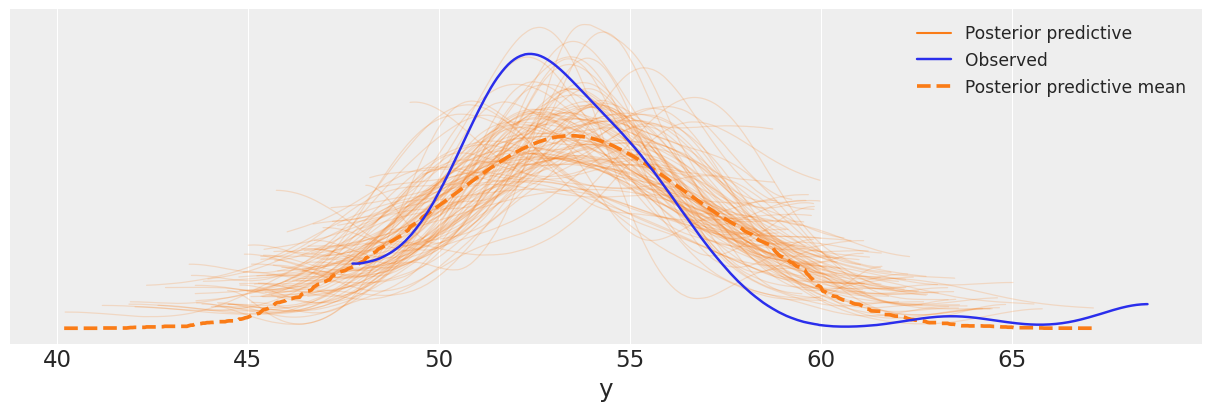

In [12]:
y_pred_3 = pm.sample_posterior_predictive(trace_3, model=model_3, extend_inferencedata=True, random_seed=123)
data_ppc_3 = az.plot_ppc(trace_3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Wir sehen eine wesentliche Verbesserung im Vergleich zu `model_1`.

## e)

In [13]:
BF_smc = np.exp(trace_1_smc.sample_stats["log_marginal_likelihood"].mean() - trace_t_smc.sample_stats["log_marginal_likelihood"].mean())
print(np.round(BF_smc.item(),2))

0.0


Hier haben wir noch einen extremen Fall. 

Vergleichen wir noch `model_3` mit `model_t`, dann

In [14]:
BF_smc = np.exp(trace_3_smc.sample_stats["log_marginal_likelihood"].mean() - trace_t_smc.sample_stats["log_marginal_likelihood"].mean())
print(np.round(BF_smc.item(),2))

0.0


Es zeigt sich, dass `model_t` wesentlich besser die Daten beschreibt als `model_3` (Bayes-Faktor unter 0.333).